<div style="background-color: orange; padding: 10px; text-align: center;">
<h1 style="font-weight: bold; font-style: italic;">World Happiness Report 2019
    </h1>
   
</div>


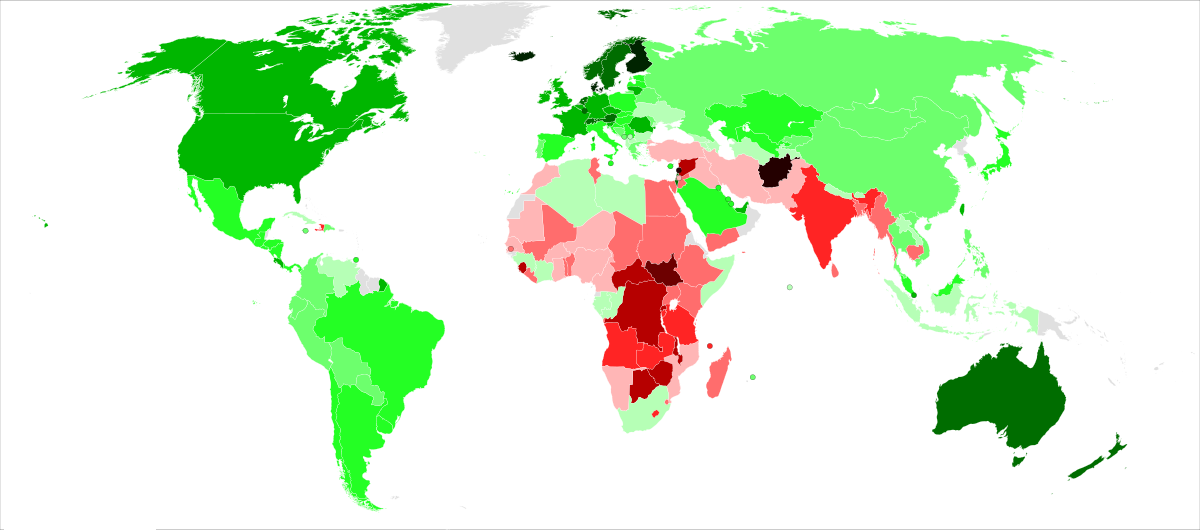

###  The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. If we add all these factors up, we get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happy=pd.read_csv('./World  Happiness Report 2019.csv')
happy


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
happy.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
import klib as k
k.clean_column_names(happy)

Long column names detected (>25 characters). Consider renaming the following columns ['freedom_to_make_life_choices'].


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [6]:
happy.isnull().mean()*100

overall_rank                    0.0
country_or_region               0.0
score                           0.0
gdp_per_capita                  0.0
social_support                  0.0
healthy_life_expectancy         0.0
freedom_to_make_life_choices    0.0
generosity                      0.0
perceptions_of_corruption       0.0
dtype: float64

In [7]:
happy.duplicated().sum()

0

In [8]:
happy.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp_per_capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
healthy_life_expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom_to_make_life_choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
perceptions_of_corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


### Univariate analysis;

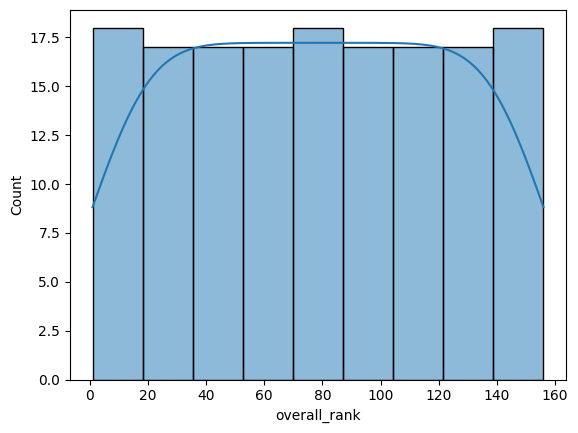

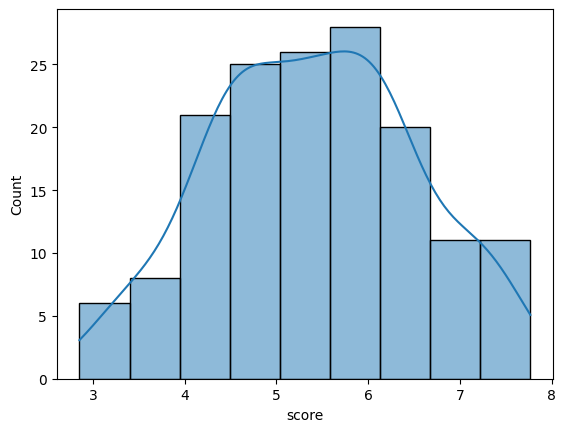

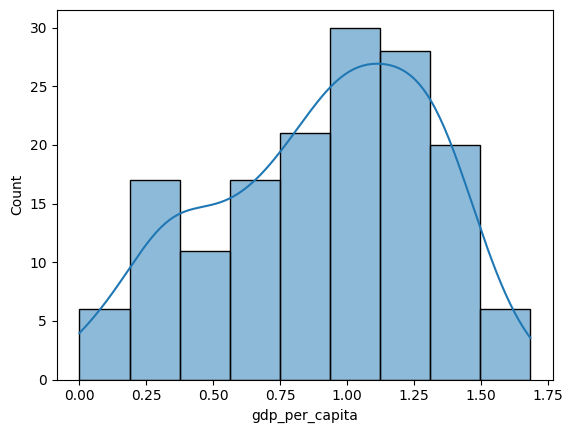

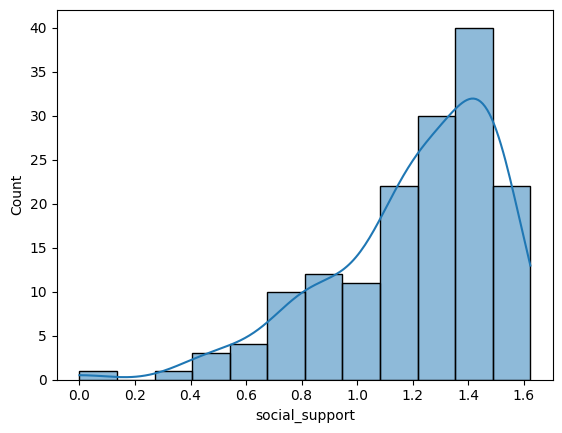

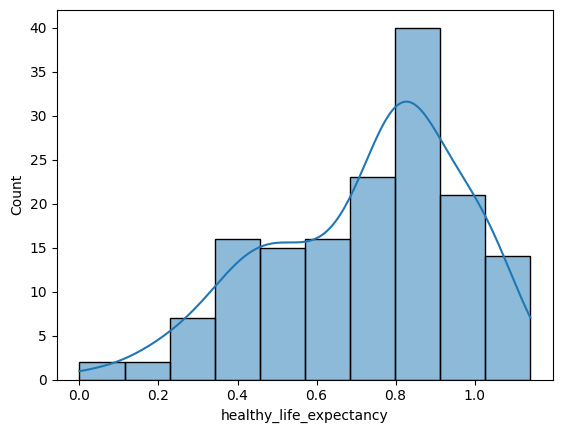

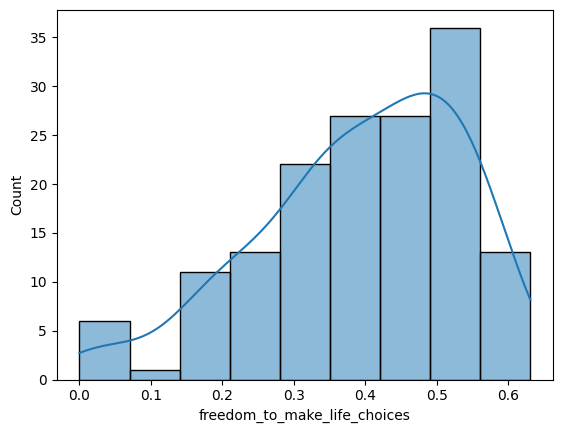

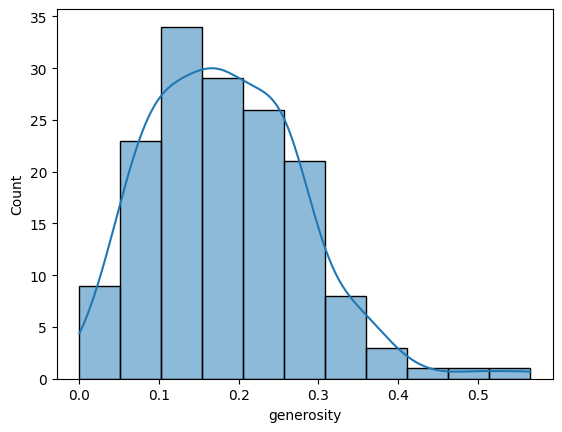

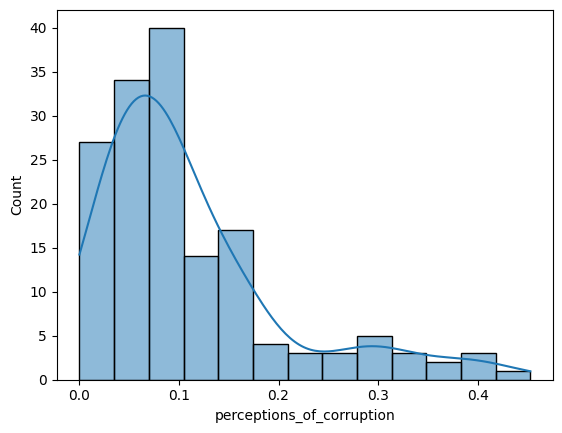

In [9]:
for i in happy.columns:
    if happy[i].dtypes !="object":
        sns.histplot(x= happy[i],kde=True)
        plt.show()

### BOXPLOT

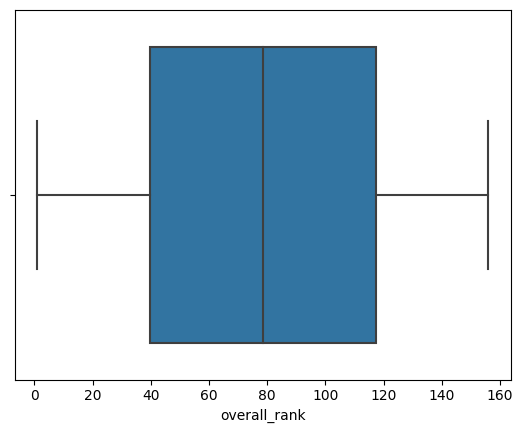

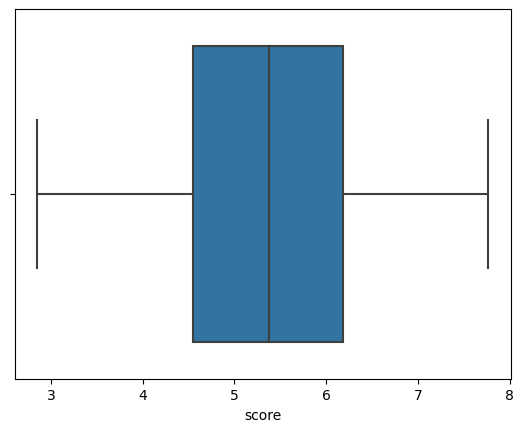

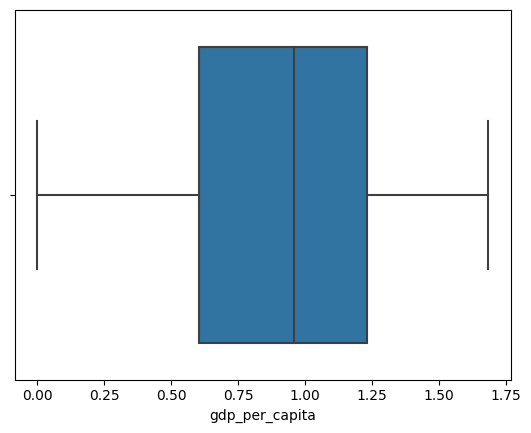

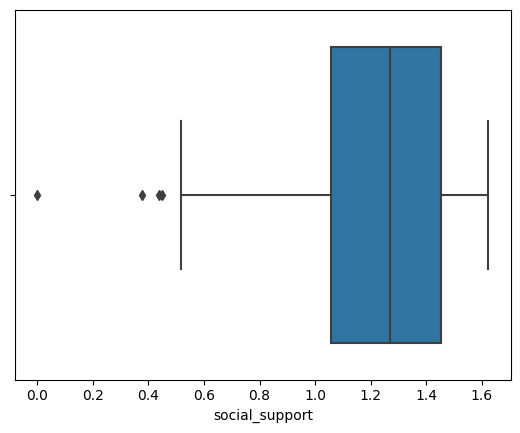

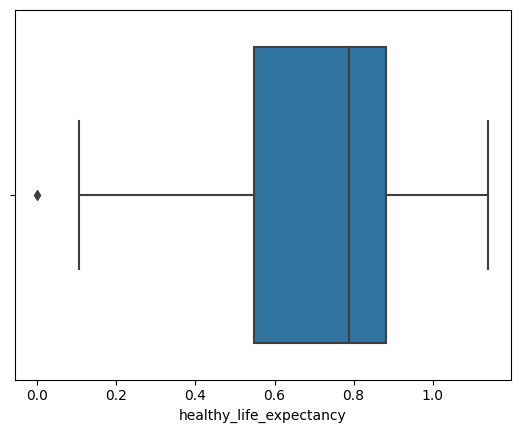

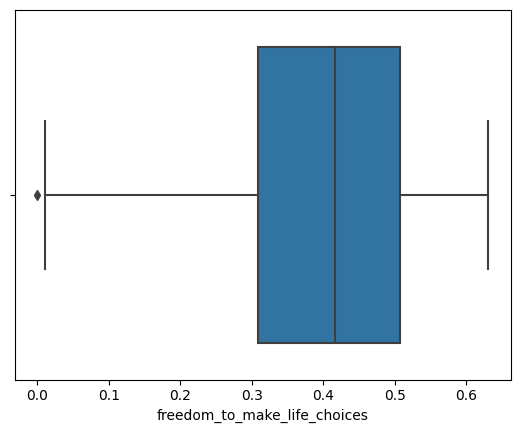

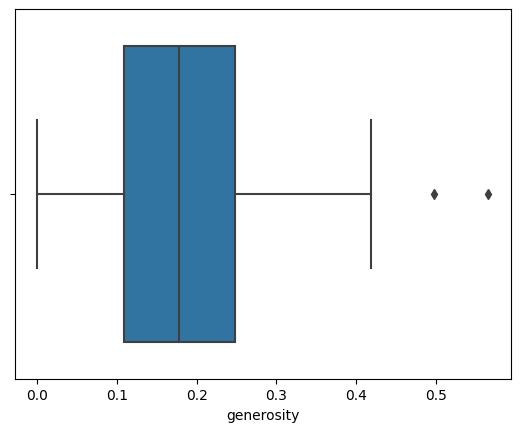

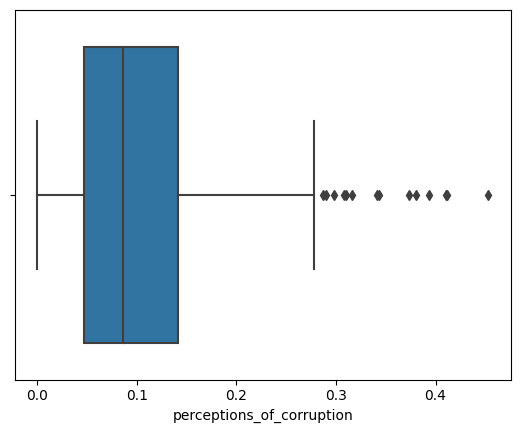

In [10]:
for i in happy.columns:
    if happy[i].dtypes !="object":
        sns.boxplot(x= happy[i])
        plt.show()

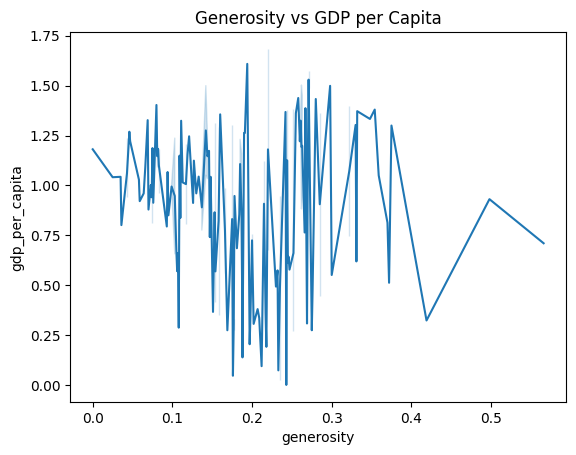

In [11]:
sns.lineplot('generosity','gdp_per_capita',data=happy)
plt.title("Generosity vs GDP per Capita")
plt.show()

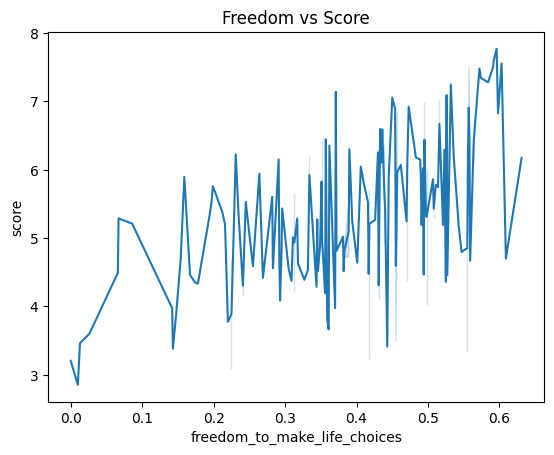

In [12]:
sns.lineplot('freedom_to_make_life_choices','score',data=happy)
plt.title("Freedom vs Score")
plt.show()

### Setting the outlier limits

In [13]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [14]:
for i in happy.columns:
    if happy[i].dtypes != "object":
        UL,LL = outlier_limit(happy[i])
        happy[i] = np.where((happy[i]>UL)|(happy[i]<LL), np.nan, happy[i])

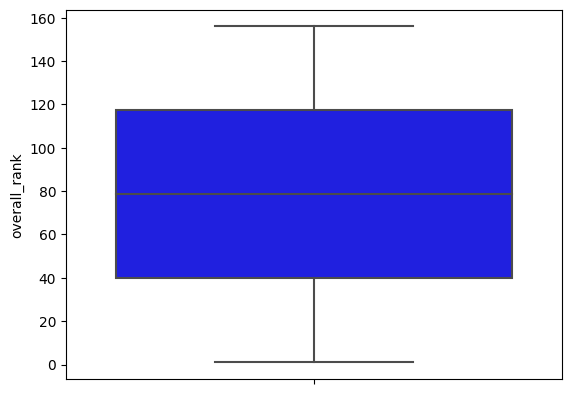

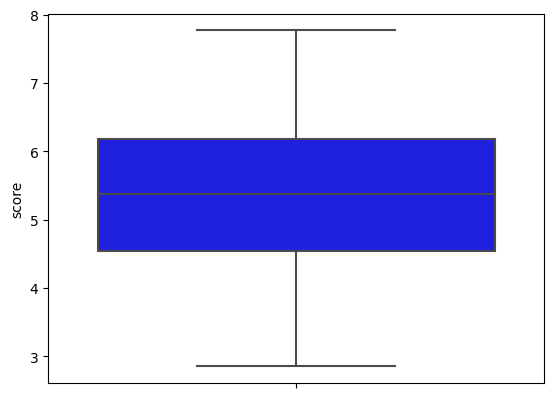

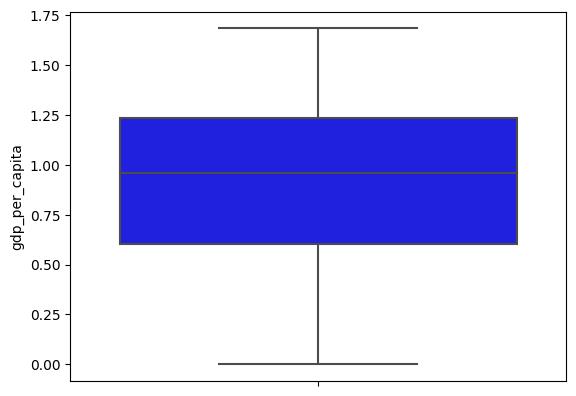

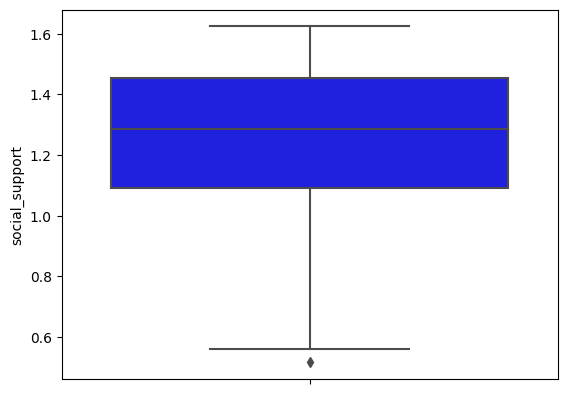

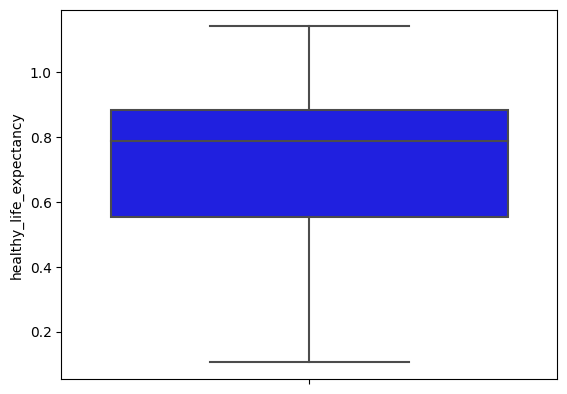

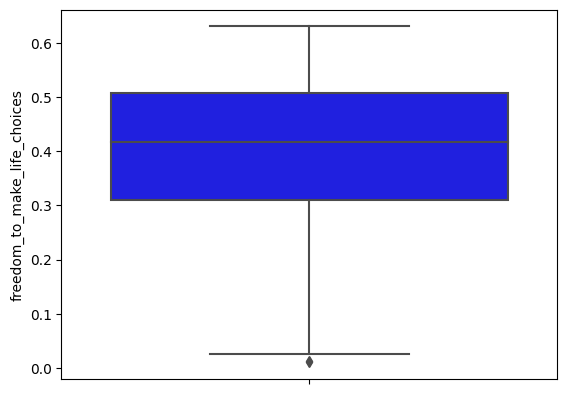

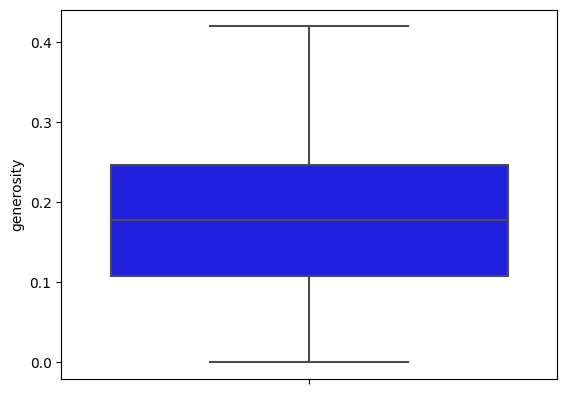

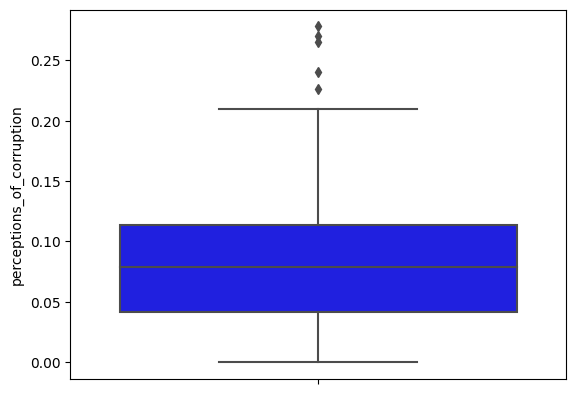

In [15]:
for i in happy.columns:
    if happy[i].dtypes != "object":
        sns.boxplot(y = happy[i], color="blue")
        plt.show()

In [16]:
happy.isnull().mean()*100

overall_rank                    0.000000
country_or_region               0.000000
score                           0.000000
gdp_per_capita                  0.000000
social_support                  2.564103
healthy_life_expectancy         0.641026
freedom_to_make_life_choices    0.641026
generosity                      1.282051
perceptions_of_corruption       8.974359
dtype: float64

In [17]:
happy.dropna(inplace=True)

### Label encoding the categorical columns

In [18]:
le=LabelEncoder()

In [19]:
happy['country_or_region']=le.fit_transform(happy['country_or_region'])


In [20]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 3 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  134 non-null    float64
 1   country_or_region             134 non-null    int32  
 2   score                         134 non-null    float64
 3   gdp_per_capita                134 non-null    float64
 4   social_support                134 non-null    float64
 5   healthy_life_expectancy       134 non-null    float64
 6   freedom_to_make_life_choices  134 non-null    float64
 7   generosity                    134 non-null    float64
 8   perceptions_of_corruption     134 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 9.9 KB


### Checking the correlation with the target 'score'

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

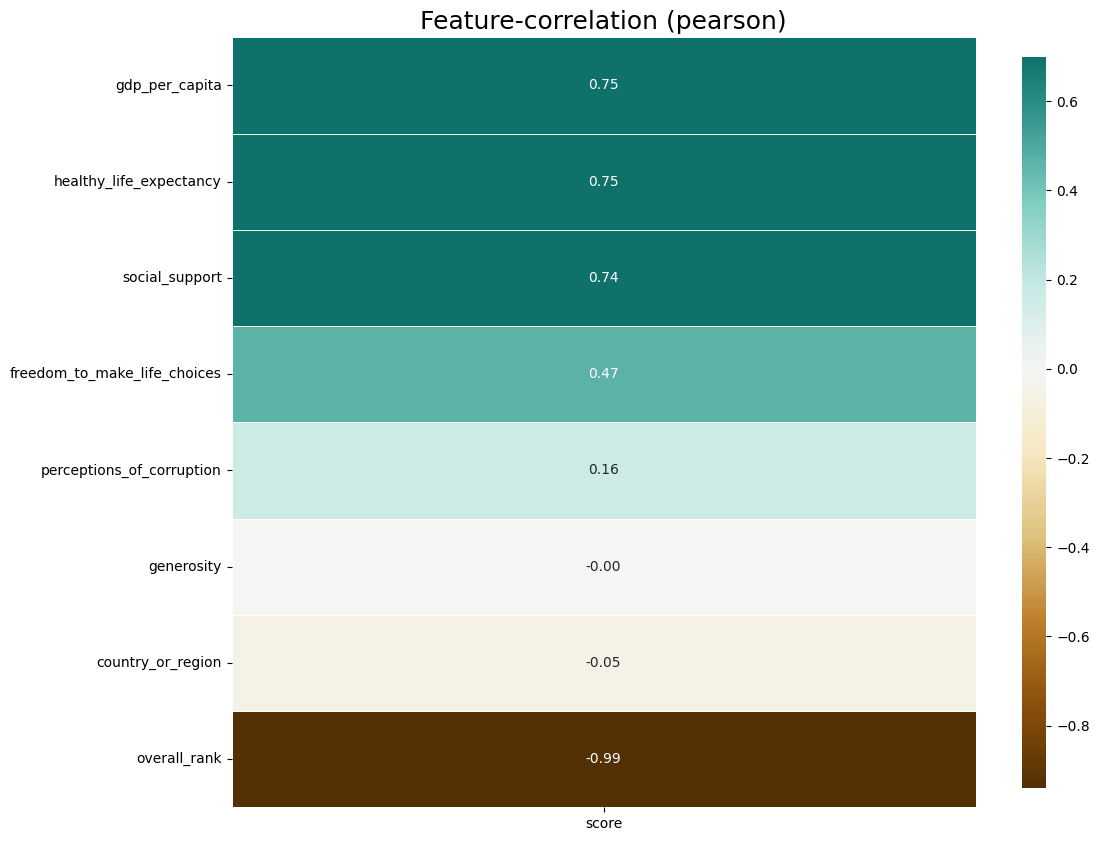

In [21]:
import klib as k
k.corr_plot(data=happy, target='score')

#### Lets take only the columns with good correlation with the target

In [22]:
x=happy[['gdp_per_capita','healthy_life_expectancy','social_support']].values
y=happy[['score']].values

### Feature Scaling

In [23]:
sc = StandardScaler()
x = sc.fit_transform(x)

### Splitting the data into training and testing set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [26]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [27]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with linearRegression
r2score: 76.1906145794502
training_score: 65.2179096673701
testing_score: 76.1906145794502
mae: 0.38231015076343405
mse: 0.2196854727310008
rmse_test: 0.4687061688638211
****************************************************************************************************
model trained with Ridge
r2score: 76.12417567194484
training_score: 65.2169358229606
testing_score: 76.12417567194484
mae: 0.3831305141166343
mse: 0.2202984941318157
rmse_test: 0.46935966393781187
****************************************************************************************************
model trained with LinearSVR
r2score: 72.94992394139712
training_score: 63.05548218142618
testing_score: 72.94992394139712
mae: 0.4092219241779103
mse: 0.24958681802910973
rmse_test: 0.49958664716854645
****************************************************************************************************
model trained with Lasso
r2score: -2.9252319153629136
training_score: 0.0
testing_score: -2

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : linearRegression
AVERAGE RMSE:  0.5916914718580106
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.5912791946623279
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.6046981169497692
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  0.896544333410535
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.6110779119644199
****************************************************************************************************
cross validation model : BaggingRegressor
AVERAGE RMSE:  0.6098501229097686
************************************************************

#### We can see that Ridge Regression is having the best overall performance so far. We may proceed with it.

In [29]:
RR = Ridge()

In [30]:
RR.fit(x_train, y_train)

Ridge()

In [31]:
y_pred = RR.predict(x_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2202984941318157

In [33]:
rmse = np.sqrt(mse)
rmse

0.46935966393781187

In [34]:
y_pred=model.predict(x)


In [35]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,7.494,7.41474
1,7.246,7.17296
2,7.167,6.13347
3,7.139,6.82437
4,7.054,7.00391


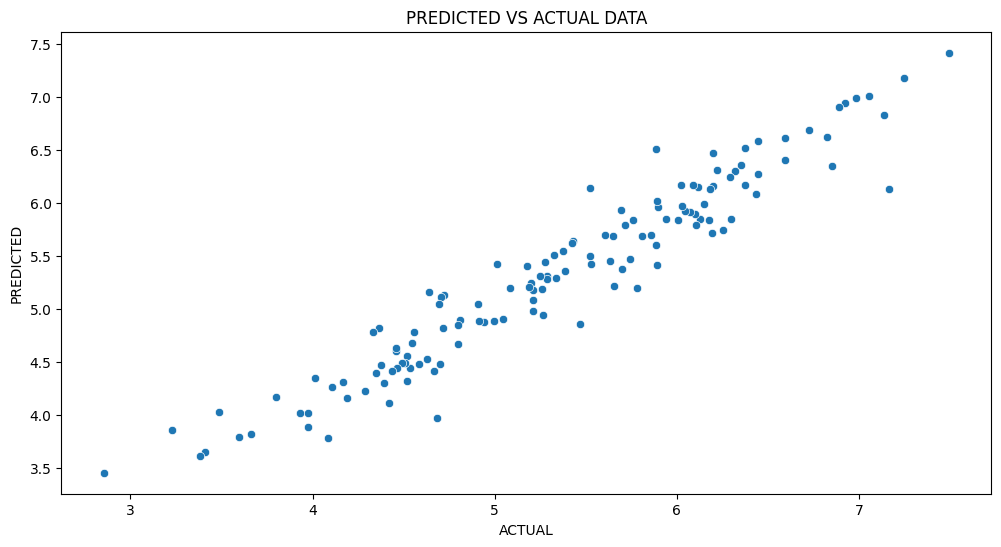

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");